# This Ipython Notebook presents every calculation in the manuscript Evidence that 1I/2017 U1 (Oumuamua) was composed of molecular hydrogen ice.


In [2]:
#define relevant functions
import numpy as np
from scipy import optimize
%matplotlib inline
import matplotlib.pyplot as plt
#function for the hyperbolic eccentric anomaly
def fun(x,M,e):
    E=x[0]
    return M-e*np.sinh(E)+E 
def fun2(x,E,e):
    theta=x[0]
    return np.cosh(E)*(1.+e*np.cos(theta))-np.cos(theta)-e
def get_distance(t,mu,a,v_inf,Eguess,e=1.20):
    #mean anomaly
    M= np.sqrt(mu/(-1.*a**3))*(t)
    #solve for eccentric annomaly 
    sol= optimize.root(fun, [Eguess],args=(M,e), method='hybr')
    E= sol.x[0]
    #solve for true anomaly
    true_anomaly= 2.*np.arctan(np.tanh(E/2.)*np.sqrt((e+1.)/(e-1.)))
    #get the distance
    l = a*(1.-e*e)
    r = l/(1.+e*np.cos(true_anomaly))
    return r,E

In [29]:
gamma=4./3.
G=6.674e-8#cm^3 g^-1 s^-2 #gravitational constant
Msun = 1.988435e33 #g maass of sun
mu = G*Msun #mu parameter
AU=1.496e13#cm #1AU in cm
year = 60.*60.*24.*365.#1 year in seconds
a=-1.2798*AU #hyperbolic semi major axis - rp = a(1-e)  - which gives rp= 0.255
v_inf=5.59*AU/year # escape velocity in cm/s
e=1.20 #eccentricity

startime= 3.456e6/60./60./24./365. #number of seconds between September 9 and October 17 2017
boltzman = 1.381e-16 #erg / kelvin
Joule_toErg = 1.e7

gamma=4./3.
times = np.linspace(1.,-1.,100000)
timessec = times*year
timessec = times*year
dt = timessec[0]-timessec[1]
dist_ar=np.zeros_like(times)
fluxrec=np.zeros_like(times)
totflux=0.
Lsunwatt = 3.848e26 #watts
watt_to_erg = 1.e7 #ergs / watt
Lsun = Lsunwatt*watt_to_erg
i=0

for t in times:
    
    if (i==0):
        r,E = get_distance(t*year,mu,a,v_inf,-50.,e)
        
       
    else:
        r,E = get_distance(t*year,mu,a,v_inf,E,e)
         
    
    dist_ar[i]=r
    flux = Lsun/(4.*np.pi*r*r)
    totflux+=flux*dt
    fluxrec[i]=flux
    i+=1

# Check Distance and Flux as a function of Time

0.2559600361020387


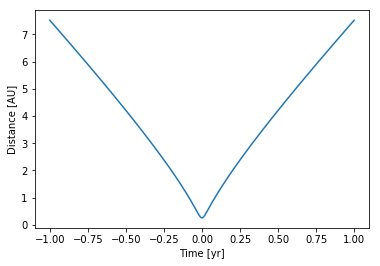

In [40]:
plt.plot(times,dist_ar/AU)
plt.xlabel('Time [yr]')
plt.ylabel('Distance [AU]')

print min(dist_ar)/AU

total flux is in erg/cm^2 44894697542805.06


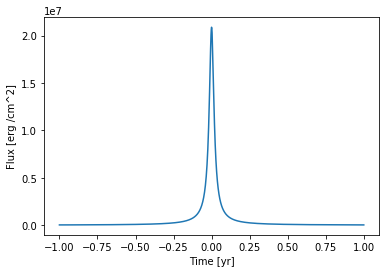

In [37]:
plt.plot(times,fluxrec)
plt.xlabel('Time [yr]')
plt.ylabel('Flux [erg /cm^2]')
print "total flux is in erg/cm^2", totflux


Because `Oumuamua's orbit was well-determined, the time-dependent flux of solar energy that it received is known to high accuracy. For models that adopt sublimation-driven out-gassing as the source of the anomalous acceleration, this energy input $E_{tot}=4.5\times10^{13}\,{\rm erg\,cm^{-2}}$ (integrated over the two years surrounding periastron), must provide both sublimation enthalpy as well as the particle kinetic energy of the out-flowing molecules. As was pointed out by \citet{Sekanina2019}, this energy budget imparts a strongly non-trivial constraint and indeed, precludes common molecular species as accelerants. In the case of the current consensus view that posits a prolate geometry for the body and water ice as the substrate, the energy constraint is particularly severe. 

To fix ideas, we can first consider an idealized, one-dimensional model in which a face of a rectangular prism of pure, perfectly absorbing ice is illuminated by normally incident sunlight. The flux, ${\cal N}$, of sublimated molecules leaving a directly illuminated patch of surface ice is
\begin{equation}
{\cal N}=\frac{(1-p)Q(t)-\epsilon \sigma T_S^4}{\Delta H/N_{A}+\gamma kT_S}\, ,
\end{equation}
where $Q(t)$ is the local solar irradiance, $\epsilon$ is the surface emissivity, $\Delta H$ is the sublimation enthalpy of the ice, $T_S$ is the sublimation temperature, $\gamma$ is the adiabatic index of the escaping vapor, and $p$ is the surface albedo, which is controlled by the admixture of impurities in the sublimating ice. 


In [38]:
#function to get curly N in the above equation, for a given Temperature of sublimating jet, enthalpy of sublimation, 
#adiabatic index and albedo of the body assumed. This is calulcated at r~1.4AU where oumuamua was observed with 
#nongrav 2.5e-4 cm/s^2
def get_number_persecond_perarea(Temperature,deltaH_X,gamma,albedo):
    epsilon = 1.-albedo
    Lsunwatt = 3.848e26 #watts
    watt_to_erg = 1.e7 #ergs / watt
    Lsun = Lsunwatt*watt_to_erg
    AU=1.496e13#cm
    r=1.4*AU
    flux = Lsun/(4.*np.pi*r*r)
    steffan_boltz= 5.670367e-5 #ergs per second per cm^2 per kelvin^4
    Avogadro=6.0221409e23
    boltzman = 1.381e-16 #erg / kelvin
    curlyN=(flux*(1.-albedo)-epsilon*steffan_boltz*Temperature**4.)/(deltaH_X/Avogadro+ gamma*boltzman*Temperature)
    return curlyN


In the simplest one-dimensional model, a column with unit cross-section, bulk density, $\rho$, and length, $l$ is exposed at one end to the solar flux. For any given volatile species, one finds the length $l$, and the associated mass, $\rho l$, accelerated by sublimation that matches the observed acceleration.

For a species with mass $\mu m_{\rm u}$, the sublimating molecules exit isotropically into the hemisphere associated with the zenith normal to the surface. Evaluating the hemispheric integral, the total number of molecules is twice that necessary to produce the anomalous acceleration with a purely normal exiting outflow. The sublimation velocity is $c_s=\sqrt{ \gamma k T_{S}/(\mu m_{\rm u})}$ \citep{probstein1969}. The outflow thus produces a change in momentum, 
${\cal N}(\mu m_{\rm u})c_s=\delta m2\vert \alpha \vert$, in the unit column, accelerating net mass, $\delta m={\cal N}\,(\mu m_{\rm u} \gamma k T_{S})^{1/2}/2\vert \alpha \vert$ in the anti-solar direction, ${\bf \hat{r}}$. The equivalent length of a column accelerated by a particular species of density $\rho$ is thus given by $l_{e} \sim \delta m/\rho$. For pure H$_2$O ice, using the enthalpy of sublimation listed in Table 1, the equivalent length $l_{e}\sim 15 \,{\rm m}$. This dimension is smaller than the shortest axis length $c=19\,{\rm m}$ of \citet{Mashchenko2019}'s best-fit oblate model, thereby ruling out acceleration arising from water ice sublimation. By contrast, the same calculation for H$_2$ ice (which has a sublimation temperature, $T_{\rm {H}_2}=6\,$K, sublimation enthalpy $\Delta H=1\,{\rm kJ\,mol^{-1}}$, and density, $\rho_{\rm {H}_2}\,{\rm g\, cm^{-3}}$) gives $l_{e}\sim 540\, {\rm m}$, rendering it a far more viable accelerant.



In [56]:
#function to get deltam defined above
def get_deltam(Temperature,mass_X,curlyN,gamma):
    AU=1.496e13#cm
    r=1.4*AU
    A_ng_r = 4.92e-4*(r/AU)**(-2)
    boltzman = 1.381e-16 #erg / kelvin
    deltaM=curlyN*np.sqrt(gamma*boltzman*Temperature*mass_X)/A_ng_r/2.
    return deltaM

#check values for H2
rho_H2=0.08
albedo=0.1

Temperature_H2=6.
Joule_toErg = 1.e7
deltaH_H2 = 1000. *Joule_toErg#Jouels per mole
gamma=4./3.
mass_H2=2.*1.67e-24
curlyN=get_number_persecond_perarea(Temperature_H2,deltaH_H2,gamma,albedo)
print "flux of molecules per cm^2 per second is",curlyN,"molecules of H2 per second per cm^2"
deltam=get_deltam(Temperature_H2,mass_H2,curlyN,gamma)
print "capable of accelerating a delta mass of", deltam, "g/cm^2"
print "this corresponds to an effective length for H2 of", deltam/rho_H2, "cm or," , deltam/rho_H2/100., "m"


flux of molecules per cm^2 per second is 3.54752265163e+19 molecules of H2 per second per cm^2
capable of accelerating a delta mass of 4292.410181258425 g/cm^2
this corresponds to an effective length for H2 of 53655.12726573031 cm or, 536.5512726573031 m


In [57]:
# same calculation for H2O
mass_H2O = 3.e-23
DeltaH_Ice = 54.46*1.e3 #molar heat of water in J/mol
deltaH_H2O = DeltaH_Ice*Joule_toErg
rho_H2O = .82
Temperature_H2O=155.
curlyN=get_number_persecond_perarea(Temperature_H2O,deltaH_H2O,gamma,albedo)
print "flux of molecules per cm^2 per second is",curlyN,"molecules of H2O per second per cm^2"
deltam=get_deltam(Temperature_H2O,mass_H2O,curlyN,gamma)
print "capable of accelerating a delta mass of", deltam, "g/cm^2"
print "this corresponds to an effective length for H2O of", deltam/rho_H2O, "cm or," , deltam/rho_H2O/100., "m"




flux of molecules per cm^2 per second is 6.4190774869e+17 molecules of H2O per second per cm^2
capable of accelerating a delta mass of 1183.1131329442032 g/cm^2
this corresponds to an effective length for H2O of 1442.8208938343944 cm or, 14.428208938343944 m



A more accurate assessment requires that the oblate geometry of `Oumuamua be taken explicitly into account. For a given volatile molecule, and a given assumed overall shape, we can calculate the fraction, $f$, of the total surface area that must be covered by exposed ice. The disk-like $a$:$a$:$c\sim6$:$6$:$1$ most-probable model given by \citet{Mashchenko2019} has physical dimensions 115 m x 111 m x 19 m. To simplify analytic calculations, we symmetrize this to 113 m x 113 m x 19 m. In parallel, we can evaluate the 342 m x 42 m x 42 m prolate model.

For these two models, the mass-to-surface-area ratios, $\eta$ are given by

\begin{equation}
 \eta_{obl}=\frac{2c\rho}{3(1+({c^2}/{e a^2})\tanh^{-1}e)}\,,
\end{equation}
and

\begin{equation}
 \eta_{pro}=\frac{2a\rho}{3(1+({a}/{e c})\sin^{-1}e)}\,,
\end{equation}
where $e=\sqrt{1-c^2/a^2}$ is the ellipsoid's eccentricity. 

Aperiodicity in the light curve suggests that Oumuamua experienced tumbling motion as it traversed the inner Solar System. The total amount of  energy it received from the solar illumination therefore varied in proportion with the instantaneous projected surface area. We define the parameter, $\xi$, which denotes the average projected surface area of the body divided by its total surface area. When isotropically averaged over all viewing angles, $\xi=1/4$ for any convex body \citep{Meltzer1949}, but Oumuamua's tumbling motion prevented it from receiving fully isotropic time-averaged illumination during its observed acceleration. 

We use the light curve to infer the amount of flux that `Oumuamua received under the assumption of zero solar phase angle and constant surface albedo. With these constraints, the light curve variations correspond to the instantaneous projected surface area reflecting sunlight directly back to the Earth. We assume that the maxima in the light intensity correspond to the maximal projected surface area. For example, for the oblate spheroidal geometry, this would be a head-on view of the disk.  Within these assumptions, the average of the intensity values divided by the maximum intensity gives an estimate of the mean projected surface area as a fraction of the maximum projected surface area.

We introduce the quantity, $\zeta$, which denotes the \textit{maximum} projected surface area as a fraction of the total surface area. For the oblate and prolate geometries, this quantity is given by,

\begin{equation}
 \zeta_{obl}=\frac{1}{2(1+({c^2}/{e a^2})\tanh^{-1}e)}\,,
\end{equation}

and

\begin{equation}
 \zeta_{pro}=\frac{a}{2c(1+({a}/{(e c)})\sin^{-1}e)}\,.
\end{equation}



# Use Digitized Lightcurve to Infer Average Projected Surface Area

mean of the total flux is, 9.066602786537859e-10
mean of the max fluxes is 2.141878799015108e-09
Imean / Imax ~ 0.42330139271684847


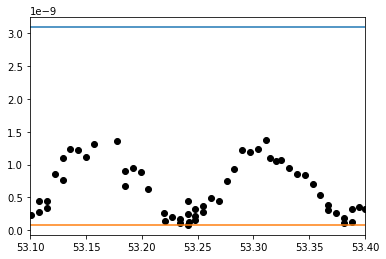

In [70]:
#read in data
plotA=np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/redigitizeafigure/plotA.csv',comments='#', delimiter=',' )
plotB=np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/redigitizeafigure/plotB.csv',comments='#', delimiter=',' )
plotC=np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/redigitizeafigure/plotC.csv',comments='#', delimiter=',' )
plotD=np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/redigitizeafigure/plotD.csv',comments='#', delimiter=',' )
plotE=np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/redigitizeafigure/plotE.csv',comments='#', delimiter=',' )
plotF=np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/redigitizeafigure/plotF.csv',comments='#', delimiter=',' )
plotG=np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/redigitizeafigure/plotG.csv',comments='#', delimiter=',' )
plotH=np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/redigitizeafigure/plotH.csv',comments='#', delimiter=',' )
plotI=np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/redigitizeafigure/plotI.csv',comments='#', delimiter=',' )
p1 = np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/figure4samples/figure4_topplot.csv',comments='#', delimiter=',' )
p2 = np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/figure4samples/figure4_middleplot_reddata.csv',comments='#', delimiter=',' )
p3 = np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/figure4samples/figure4_middleplot_blackdata.csv',comments='#', delimiter=',' )
p4 = np.genfromtxt('/Users/darrylseligman/Oumuamua/New_Acceleration_Analysis/LightCurve_Analysis/figure4samples/figure4_bottomplot.csv',comments='#', delimiter=',' )

#convert to flux
fluxa = 10.**(plotA.T[1]/-2.5)
fluxb = 10.**(plotB.T[1]/-2.5)
fluxc = 10.**(plotC.T[1]/-2.5)
fluxd = 10.**(plotD.T[1]/-2.5)
fluxe = 10.**(plotE.T[1]/-2.5)
fluxf = 10.**(plotF.T[1]/-2.5)
fluxg = 10.**(plotG.T[1]/-2.5)
fluxh = 10.**(plotH.T[1]/-2.5)
fluxi = 10.**(plotI.T[1]/-2.5)

totflux=np.concatenate([fluxa,fluxb,fluxc,fluxd,fluxe,fluxf,fluxg,fluxh,fluxi])
print "mean of the total flux is," , totflux.mean()

fluxmaxes =[ fluxa.max(), fluxb.max(), fluxc.max(), fluxd.max(), fluxe.max(), fluxf.max(), fluxg.max(), fluxh.max(), fluxi.max()]
print "mean of the max fluxes is",np.array(fluxmaxes).mean()
print "Imean / Imax ~", totflux.mean()/np.array(fluxmaxes).mean()

plt.plot(plotA.T[0],fluxa,'ko')
plt.plot(plotB.T[0],fluxb,'ko')
plt.plot(plotC.T[0],fluxc,'ko')
plt.xlim([53.1,53.4])

plt.plot([50,55],[totflux.max(),totflux.max()])
plt.plot([50,55],[totflux.min(),totflux.min()])


We then measure the average maxima of each pulse in the digitized light curve, $I_{max}$, and the average intensity $I_{mean}$ over all points, and find that $ I_{mean}/I_{max}\sim0.42$. . This allows us to calculate $\xi$ for both the prolate and oblate geometry, using $\xi = I_{mean}/I_{max}\zeta$. Adopting the 6:6:1 and the 8:1:1 shape models and the high signal-to-noise photometry obtained from 25 Oct 2017 through 1 Nov 2017 \citep{Belton2018}, we find  $\zeta_{oblate}\sim0.47$ and $\zeta_{prolate}\sim0.32$, corresponding to  $\xi_{oblate}\sim0.2$ and $\xi_{prolate}\sim0.13$.


Combining the above relations gives an expression for the fraction, $f=f(p,\epsilon,\rho)$, of an oblate surface that must be covered with sublimating ice to produce the observed radial acceleration ($f={\eta}/{(\xi\delta m)}$),
\begin{equation}
f=\frac{4(\Delta H/N_A+\gamma k T_S)\rho c\vert \alpha(t) \vert}{((1-p)Q(t)-\epsilon \sigma T_S^4)(9\mu m_{\rm u}\gamma k T_S)^{\frac{1}{2}}\xi(1+(\frac{c^2}{ea^2})\tanh^{-1}e)}\,,  \label{eqn:example}
\end{equation}
with an analogous expression holding for the acceleration of a prolate object.



In [78]:
#best fit oblate spheroid
a0=11500./2.
b0=11500./2.
c0=1900./2.

volume = 4./3.*np.pi*a0*a0*c0
eccentricity = np.sqrt(1.-c0**2/a0**2)
surface_area = 2.*np.pi*a0*a0*(1.+c0**2/a0**2/eccentricity*np.arctanh(eccentricity))


print "xi oblate,", np.pi*a0*a0/surface_area


xi oblate, 0.46780298410407145


In [77]:
#proalte
a0=32400./2.
b0=4200./2.
c0=4200./2.

volume = 4./3.*np.pi*a0*b0*c0
eccentricity = np.sqrt(1.-c0**2/a0**2)
surface_area = 2.*np.pi*c0*c0*(1.+a0/c0/eccentricity*np.arcsin(eccentricity))
print "xi prolate,",np.pi*a0*c0/surface_area

xi prolate, 0.31591768946785415


In [58]:
def get_eta(rho,volume,surface_area):
    return rho*volume/surface_area
def get_fraction_oblate(a0,b0,c0,Temperature,deltaH_X,mass_X,rho_X,gamma,albedo,xi):
    volume = 4./3.*np.pi*a0*a0*c0
    eccentricity = np.sqrt(1.-c0**2/a0**2)
    surface_area = 2.*np.pi*a0*a0*(1.+c0**2/a0**2/eccentricity*np.arctanh(eccentricity))
    eta = get_eta(rho_X,volume,surface_area)
    curlyN=get_number_persecond_perarea(Temperature,deltaH_X,gamma,albedo)
    AU=1.496e13#cm

    deltam=get_deltam(Temperature,mass_X,curlyN,gamma)
    return eta/deltam/xi

# Generate Data for Table 1

In [61]:
#best fit oblate spheroid
a0=11300./2.
b0=11300./2.
c0=1900./2.
xi=0.25

rho_H2=0.08
albedo=0.1
#Temperature_H2=15.
Temperature_H2=6.
Joule_toErg = 1.e7
deltaH_H2 = 1000. *Joule_toErg#Jouels per mole
gamma=4./3.
mass_H2=2.*1.67e-24

print "for oblate H2, xi=0.25, f=",get_fraction_oblate(a0,b0,c0,Temperature_H2,deltaH_H2,mass_H2,rho_H2,gamma,albedo,xi)

mass_hydrogen=1.67e-24#grams

rho_NE=1.507 #grams/ cm^3
deltaH_NE = 1.9 *1.e3*Joule_toErg#Jouels per mole
mass_NE=20.18*mass_hydrogen#3.35e-23
Temperature_NE=8.
print "for oblate  Ne, xi=0.25 f=", get_fraction_oblate(a0,b0,c0,Temperature_NE,deltaH_NE,mass_NE,rho_NE,gamma,albedo,xi)

rho_N2=1.023 #grams/ cm^3
deltaH_N2 = 7.34 *1.e3*Joule_toErg#Jouels per mole
mass_N2=14.*mass_hydrogen*2.#2.*4.7e-23
Temperature_N2=23.

print "for oblate N2,  xi=0.25,f=",get_fraction_oblate(a0,b0,c0,Temperature_N2,deltaH_N2,mass_N2,rho_N2,gamma,albedo,xi)

rho_AR=1.753 #grams/ cm^3 #ref https://www.sciencedirect.com/science/article/pii/0375960167906561
deltaH_AR = 7.79 *1.e3*Joule_toErg#Jouels per mole
mass_AR=mass_hydrogen*39.948
Temperature_AR=27.5

print "for oblate AR, xi=0.25, f=", get_fraction_oblate(a0,b0,c0,Temperature_AR,deltaH_AR,mass_AR,rho_AR,gamma,albedo,xi)

rho_O2=1.525 #grams/ cm^3 #ref https://www.sciencedirect.com/science/article/pii/0375960167906561
deltaH_O2 = 9.26 *1.e3*Joule_toErg#Jouels per mole
mass_O2=mass_hydrogen*(15.9994*2.)
Temperature_O2=29.

print "for oblate O2, xi=0.25, f=",get_fraction_oblate(a0,b0,c0,Temperature_O2,deltaH_O2,mass_O2,rho_O2,gamma,albedo,xi)


rho_KR=3.04 #grams/ cm^3
deltaH_KR = 11.54 *1.e3*Joule_toErg#Jouels per mole
mass_KR=83.8*mass_hydrogen#2.*4.7e-23
Temperature_KR=38.5

print "for oblate KR, xi=0.25, f=",get_fraction_oblate(a0,b0,c0,Temperature_KR,deltaH_KR,mass_KR,rho_KR,gamma,albedo,xi)

rho_XE=3.706 #grams/ cm^3
deltaH_XE = 15.79 *1.e3*Joule_toErg#Jouels per mole
mass_XE=131.3*mass_hydrogen#2.*4.7e-23

Temperature_XE=50.

print "for oblate XE, xi=0.25, f=",get_fraction_oblate(a0,b0,c0,Temperature_XE,deltaH_XE,mass_XE,rho_XE,gamma,albedo,xi)

#https://webbook.nist.gov/cgi/cbook.cgi?ID=C630080&Mask=4
rho_CO=1.56 #grams/ cm^3
deltaH_CO = 8.1 *1.e3*Joule_toErg#Jouels per mole
mass_CO=(12.+15.999)*mass_hydrogen#2.*4.7e-23
Temperature_CO=60.
#print "for oblate CO, f=",get_fraction_oblate(a0,b0,c0,Temperature_CO,deltaH_CO,mass_CO,rho_CO,gamma,albedo)



rho_CO2=1.56 #grams/ cm^3
deltaH_CO2 = 28.84 *1.e3*Joule_toErg#Jouels per mole
mass_CO2=(12.+2.*15.999)*mass_hydrogen#2.*4.7e-23
Temperature_CO2=80.
print "for oblate CO2, xi=0.25, f=",get_fraction_oblate(a0,b0,c0,Temperature_CO2,deltaH_CO2,mass_CO2,rho_CO2,gamma,albedo,xi)




mass_H2O = 3.e-23
DeltaH_Ice = 54.46*1.e3 #molar heat of water in J/mol
deltaH_H2O = DeltaH_Ice*Joule_toErg
rho_H2O = .82
Temperature_H2O=155.

print "for oblate H2O, xi=0.25, f=", get_fraction_oblate(a0,b0,c0,Temperature_H2O,deltaH_H2O,mass_H2O,rho_H2O,gamma,albedo, xi=0.25)





for oblate H2, xi=0.25, f= 0.04409293011052351
for oblate  Ne, xi=0.25 f= 0.42225492439097834
for oblate N2,  xi=0.25,f= 0.5481105280537644
for oblate AR, xi=0.25, f= 0.7664738280300135
for oblate O2, xi=0.25, f= 0.858739088707553
for oblate KR, xi=0.25, f= 1.1467702898756735
for oblate XE, xi=0.25, f= 1.3389797221897757
for oblate CO2, xi=0.25, f= 1.4039720483766305
for oblate H2O, xi=0.25, f= 1.6397127229782387


In [63]:
#best fit oblate spheroid
a0=11300./2.
b0=11300./2.
c0=1900./2.
xi = 0.198

print "for oblate H2, xi=0.2, f=",get_fraction_oblate(a0,b0,c0,Temperature_H2,deltaH_H2,mass_H2,rho_H2,gamma,albedo,xi)
print "for oblate  Ne, xi=0.2 f=", get_fraction_oblate(a0,b0,c0,Temperature_NE,deltaH_NE,mass_NE,rho_NE,gamma,albedo,xi)
print "for oblate N2,  xi=0.2,f=",get_fraction_oblate(a0,b0,c0,Temperature_N2,deltaH_N2,mass_N2,rho_N2,gamma,albedo,xi)
print "for oblate AR, xi=0.2, f=", get_fraction_oblate(a0,b0,c0,Temperature_AR,deltaH_AR,mass_AR,rho_AR,gamma,albedo,xi)
print "for oblate O2, xi=0.2, f=",get_fraction_oblate(a0,b0,c0,Temperature_O2,deltaH_O2,mass_O2,rho_O2,gamma,albedo,xi)
print "for oblate KR, xi=0.2, f=",get_fraction_oblate(a0,b0,c0,Temperature_KR,deltaH_KR,mass_KR,rho_KR,gamma,albedo,xi)
print "for oblate XE, xi=0.2, f=",get_fraction_oblate(a0,b0,c0,Temperature_XE,deltaH_XE,mass_XE,rho_XE,gamma,albedo,xi)
print "for oblate CO2, xi=0.2, f=",get_fraction_oblate(a0,b0,c0,Temperature_CO2,deltaH_CO2,mass_CO2,rho_CO2,gamma,albedo,xi)
print "for oblate H2O, xi=0.2, f=", get_fraction_oblate(a0,b0,c0,Temperature_H2O,deltaH_H2O,mass_H2O,rho_H2O,gamma,albedo, xi)






for oblate H2, xi=0.2, f= 0.055672891553691296
for oblate  Ne, xi=0.2 f= 0.533150157059316
for oblate N2,  xi=0.2,f= 0.6920587475426317
for oblate AR, xi=0.2, f= 0.9677699848863807
for oblate O2, xi=0.2, f= 1.0842665261459001
for oblate KR, xi=0.2, f= 1.4479422851965573
for oblate XE, xi=0.2, f= 1.6906309623608278
for oblate CO2, xi=0.2, f= 1.7726919802735233
for oblate H2O, xi=0.2, f= 2.070344347194746


In [79]:
#best fit oblate spheroid
a0=32400./2.
b0=4200./2.
c0=4200./2.
def get_fraction_prolate(a0,b0,c0,Temperature,deltaH_X,mass_X,rho_X,gamma,albedo):
    volume = 4./3.*np.pi*a0*b0*c0
    eccentricity = np.sqrt(1.-c0**2/a0**2)
    surface_area = 2.*np.pi*c0*c0*(1.+a0/c0/eccentricity*np.arcsin(eccentricity))
    xi = 0.13
    #xi=0.25
    eta = get_eta(rho_X,volume,surface_area)
    curlyN=get_number_persecond_perarea(Temperature,deltaH_X,gamma,albedo)
    deltam=get_deltam(Temperature,mass_X,curlyN,gamma)
    return eta/deltam/xi



print "for prolate H2,xi = 0.13 f=",get_fraction_prolate(a0,b0,c0,Temperature_H2,deltaH_H2,mass_H2,rho_H2,gamma,albedo)

print "for prolate Ne,xi = 0.13 f=", get_fraction_prolate(a0,b0,c0,Temperature_NE,deltaH_NE,mass_NE,rho_NE,gamma,albedo)

print "for prolate N2,xi = 0.13 f=",get_fraction_prolate(a0,b0,c0,Temperature_N2,deltaH_N2,mass_N2,rho_N2,gamma,albedo)
print "for prolate AR,xi = 0.13 f=", get_fraction_prolate(a0,b0,c0,Temperature_AR,deltaH_AR,mass_AR,rho_AR,gamma,albedo)

print "for prolate O2,xi = 0.13 f=",get_fraction_prolate(a0,b0,c0,Temperature_O2,deltaH_O2,mass_O2,rho_O2,gamma,albedo)

print "for prolate KR,xi = 0.13 f=",get_fraction_prolate(a0,b0,c0,Temperature_KR,deltaH_KR,mass_KR,rho_KR,gamma,albedo)


print "for prolate XE,xi = 0.13 f=",get_fraction_prolate(a0,b0,c0,Temperature_XE,deltaH_XE,mass_XE,rho_XE,gamma,albedo)

print "for prolate CO2,xi = 0.13 f=",get_fraction_prolate(a0,b0,c0,Temperature_CO2,deltaH_CO2,mass_CO2,rho_CO2,gamma,albedo)

print "for prolate H2O,xi = 0.13 f=", get_fraction_prolate(a0,b0,c0,Temperature_H2O,deltaH_H2O,mass_H2O,rho_H2O,gamma,albedo)






for prolate H2,xi = 0.13 f= 0.12681697632034117
for prolate Ne,xi = 0.13 f= 1.2144598377429616
for prolate N2,xi = 0.13 f= 1.5764368501456034
for prolate AR,xi = 0.13 f= 2.2044779753987047
for prolate O2,xi = 0.13 f= 2.469844811968748
for prolate KR,xi = 0.13 f= 3.2982598419179405
for prolate XE,xi = 0.13 f= 3.8510790572711544
for prolate CO2,xi = 0.13 f= 4.038005402841351
for prolate H2O,xi = 0.13 f= 4.716026107606404


In [80]:
#best fit oblate spheroid
a0=32400./2.
b0=4200./2.
c0=4200./2.
def get_fraction_prolate(a0,b0,c0,Temperature,deltaH_X,mass_X,rho_X,gamma,albedo):
    volume = 4./3.*np.pi*a0*b0*c0
    eccentricity = np.sqrt(1.-c0**2/a0**2)
    surface_area = 2.*np.pi*c0*c0*(1.+a0/c0/eccentricity*np.arcsin(eccentricity))
    xi = 0.13
    xi=0.25
    eta = get_eta(rho_X,volume,surface_area)
    curlyN=get_number_persecond_perarea(Temperature,deltaH_X,gamma,albedo)
    deltam=get_deltam(Temperature,mass_X,curlyN,gamma)
    return eta/deltam/xi



print "for prolate H2,xi = 0.25 f=",get_fraction_prolate(a0,b0,c0,Temperature_H2,deltaH_H2,mass_H2,rho_H2,gamma,albedo)

print "for prolate Ne,xi = 0.25 f=", get_fraction_prolate(a0,b0,c0,Temperature_NE,deltaH_NE,mass_NE,rho_NE,gamma,albedo)

print "for prolate N2,xi = 0.25 f=",get_fraction_prolate(a0,b0,c0,Temperature_N2,deltaH_N2,mass_N2,rho_N2,gamma,albedo)
print "for prolate AR,xi = 0.25 f=", get_fraction_prolate(a0,b0,c0,Temperature_AR,deltaH_AR,mass_AR,rho_AR,gamma,albedo)

print "for prolate O2,xi = 0.25 f=",get_fraction_prolate(a0,b0,c0,Temperature_O2,deltaH_O2,mass_O2,rho_O2,gamma,albedo)

print "for prolate KR,xi = 0.25 f=",get_fraction_prolate(a0,b0,c0,Temperature_KR,deltaH_KR,mass_KR,rho_KR,gamma,albedo)


print "for prolate XE,xi = 0.25 f=",get_fraction_prolate(a0,b0,c0,Temperature_XE,deltaH_XE,mass_XE,rho_XE,gamma,albedo)

print "for prolate CO2,xi = 0.25 f=",get_fraction_prolate(a0,b0,c0,Temperature_CO2,deltaH_CO2,mass_CO2,rho_CO2,gamma,albedo)

print "for prolate H2O,xi = 0.25 f=", get_fraction_prolate(a0,b0,c0,Temperature_H2O,deltaH_H2O,mass_H2O,rho_H2O,gamma,albedo)







for prolate H2,xi = 0.25 f= 0.0659448276865774
for prolate Ne,xi = 0.25 f= 0.6315191156263401
for prolate N2,xi = 0.25 f= 0.8197471620757139
for prolate AR,xi = 0.25 f= 1.1463285472073266
for prolate O2,xi = 0.25 f= 1.284319302223749
for prolate KR,xi = 0.25 f= 1.715095117797329
for prolate XE,xi = 0.25 f= 2.0025611097810003
for prolate CO2,xi = 0.25 f= 2.0997628094775025
for prolate H2O,xi = 0.25 f= 2.4523335759553304


# Section 3


Soon after 'Oumuamua's discovery,  \citet{Domokos2017} suggested that its unusual shape resulted from abrasion by small particles. The process of isotropized photon-driven sublimation will also produce an evolution that conforms to \citet{Domokos2017}'s theoretical model. Sublimation driven by uniform illumination generates a secular increase in the aspect ratio of the body, with large ratios being reached after a majority of the original mass has been removed. 

We have incorporated this phenomenon in a semi-analytic model that back-traces Oumuamua's motion through the Solar System and recovers the properties with which it entered the system. We assume that Oumuamua continuously sublimated H$_2$ at the rate required to generate the observed $\alpha \propto 1/r^{2}$ non-gravitational acceleration, and we assume that Oumuamua's tumbling motion isotropized exposure of its surface to the Sun over a time scale ($\sim$days) that is shorter than the time scale over which its received flux varied significantly ($\sim$weeks). Although the degree of tumbling may not have been sufficient to fully isotropize the exposure, this assumption permits assessment of the density, size and aspect ratio evolution that Oumuamua experienced while in the vicinity of the Sun.

With our timescale ordering, H$_2$ gas exits normally from the surface in thin ellipsoidal shells. In each small time increment, the geometry of Oumuamua shifts (approximately) into a new ellipsoid whose axes are each increased or decreased by an amount $\delta h$. We simulate this process using time-stepping. We start at the moment of the first observation of Oumuamua in October 2017, and integrate both forward and backward in time.

Mass loss at each time step is governed by the strength of the non-gravitational acceleration. We assume that the best-fit functional form, $\alpha(r)$ is sustained throughout the trajectory. We calculate the change in mass, $\delta m$, at each time-step of length $\Delta t$, and position in the orbit, $r$, by invoking the conservation of momentum, where


\begin{equation}
    \delta m = \frac{2 \alpha(r)\rho_{\rm{bulk}}(t)V(t)\Delta t}{\sqrt{ \gamma k T_{S}/(\mu m_{\rm u})}}\label{deltameq}\, .
\end{equation}
Here, $V(t)$ and $\rho_{\rm{bulk}}(t)$ are the volume and  bulk density at each time-step. The resulting differential volume shell,  $\delta V$, is given by $ \delta V =\delta m/\rho_{H_2}$. In order to  explicitly demand the conservation of mass and ellipsoidal geometry, we find the root of the cubic equation, $p(\delta h)$ that satisfies,

\begin{equation}
     p(\delta h)=\delta V-\frac43\pi (a\pm\delta h)(b\pm\delta h)(c\pm\delta h)=0\,,
\end{equation}
where we use the $\pm$ solutions for integrating backwards and forwards in time respectively. Since this differential volume shell is assumed to consist of pure molecular hydrogen, we calculate the resulting bulk density of Oumuamua at each timestep using,

\begin{equation}
     \rho_{\rm{bulk}}(t\pm\Delta t)=\frac{\rho_{\rm{bulk}}(t)V(t)\mp \delta m}{V(t\pm\Delta t)}\ .
\end{equation}

In [87]:
#function to calculate the aspect ratio and mass evolution of Oumuamua given initial conditions and composition
def get_aspectratio_evolution(a0,b0,c0,rho00,Temperature_X,mass_X,rho_X,Nsteps=100000):
    gamma=4./3.
    G=6.674e-8#cm^3 g^-1 s^-2 #gravitational constant
    Msun = 1.988435e33 #g maass of sun
    mu = G*Msun #mu parameter
    AU=1.496e13#cm #1AU in cm
    year = 60.*60.*24.*365.#1 year in seconds
    a=-1.2798*AU #hyperbolic semi major axis - rp = a(1-e)  - which gives rp= 0.255
    v_inf=5.59*AU/year # escape velocity in cm/s
    e=1.20 #eccentricity

    startime= 3.456e6/60./60./24./365. #number of seconds between September 9 and October 17 2017
    boltzman = 1.381e-16 #erg / kelvin
    Joule_toErg = 1.e7
    #backward integration one year in the past
    times = np.linspace(startime,-1.,Nsteps)
    timessec = times*year
    dt = timessec[0]-timessec[1]
    dist_ar=np.zeros_like(times)
    rho_ar=np.zeros_like(times)
    a_ar=np.zeros_like(times)
    c_ar=np.zeros_like(times)
    mass_ar=np.zeros_like(times)
    resids=np.zeros_like(times)
    fluxrec=np.zeros_like(times)
    i=0
    rhobulk=rho00
    totflux=0.
    Lsunwatt = 3.848e26 #watts
    watt_to_erg = 1.e7 #ergs / watt
    Lsun = Lsunwatt*watt_to_erg
    for t in times:
        if (i==0):
            r,E = get_distance(t*year,mu,a,v_inf,-50.,e)
            eccentricity = np.sqrt(1.-c0**2/a0**2)
            surface_area = 2.*np.pi*a0*a0*(1.+c0**2/a0**2/eccentricity*np.arctanh(eccentricity))
            a1=a0
            b1=b0
            c1=c0
            deltah=10.
        else:
            r,E = get_distance(t*year,mu,a,v_inf,E,e)
            eccentricity = np.sqrt(1.-c1**2/a1**2)
            surface_area = 2.*np.pi*a1*a1*(1.+c1**2/a1**2/eccentricity*np.arctanh(eccentricity))
        dist_ar[i]=r
        flux = Lsun/(4.*np.pi*r*r)
        totflux+=flux*dt
        fluxrec[i]=flux
        alpha_r = 4.92e-4*(r/AU)**(-2)
        cs = np.sqrt(gamma*boltzman*Temperature_X/mass_X)
        Volume =4./3.*np.pi*a1*b1*c1
        deltaM = dt*Volume*rhobulk*2.*alpha_r/cs
        deltaVolume = deltaM/rho_X
        sol= optimize.root(getdh, [deltah],args=(Volume+deltaVolume,a1,b1,c1), method='hybr')
        deltah= sol.x[0]
        a1+=deltah
        b1+=deltah
        c1+=deltah
        rhobulk=(rhobulk*Volume+deltaM)/(Volume+deltaVolume)
        rho_ar[i]=rhobulk
        a_ar[i]=a1
        c_ar[i]=c1
        mass_ar[i]=Volume*rhobulk
        residual = deltaM/(deltaVolume*rho_X)
        resids[i]=residual
        i+=1
    #forward integration 
    times2 = np.linspace(startime,startime+1./12.,Nsteps)
    timessec2 = times2*year
    dt = timessec2[0]-timessec2[1]
    dist_ar2=np.zeros_like(times2)
    rho_ar2=np.zeros_like(times2)
    a_ar2=np.zeros_like(times2)
    c_ar2=np.zeros_like(times2)
    mass_ar2=np.zeros_like(times2)
    resids2=np.zeros_like(times2)
    fluxrec2=np.zeros_like(times2)
    i=0
    rhobulk=rho00
    for t in times2:
        if (i==0):
            r,E = get_distance(t*year,mu,a,v_inf,-50.,e)
            eccentricity = np.sqrt(1.-c0**2/a0**2)
            surface_area = 2.*np.pi*a0*a0*(1.+c0**2/a0**2/eccentricity*np.arctanh(eccentricity))
            a1=a0
            b1=b0
            c1=c0
        else:
            r,E = get_distance(t*year,mu,a,v_inf,E,e)
            eccentricity = np.sqrt(1.-c1**2/a1**2)
            surface_area = 2.*np.pi*a1*a1*(1.+c1**2/a1**2/eccentricity*np.arctanh(eccentricity))

    
        dist_ar2[i]=r
        alpha_r = 4.92e-4*(r/AU)**(-2)
        cs = np.sqrt(gamma*boltzman*Temperature_X/mass_X)
        Volume =4./3.*np.pi*a1*b1*c1
        deltaM = dt*Volume*rhobulk*2.*alpha_r/cs
        deltaVolume = deltaM/rho_X
        sol= optimize.root(getdh, [deltah],args=(Volume+deltaVolume,a1,b1,c1), method='hybr')
        deltah= sol.x[0]
        a1+=deltah
        b1+=deltah
        c1+=deltah
        rhobulk=(rhobulk*Volume+deltaM)/(Volume+deltaVolume)
        rho_ar2[i]=rhobulk
        a_ar2[i]=a1
        c_ar2[i]=c1
        mass_ar2[i]=Volume*rhobulk
        flux = Lsun/(4.*np.pi*r*r)
        totflux+=flux*dt
        fluxrec2[i]=flux
        residual = deltaM/(deltaVolume*rho_X)
        resids2[i]=residual
        i+=1
    
    return times,times2,rho_ar,rho_ar2,a_ar,a_ar2,c_ar,c_ar2,resids,resids2,fluxrec,fluxrec2


def getdh(x,Vtp1,a,b,c):
    dh=x[0]
    return -Vtp1+4./3.*np.pi*(a+dh)*(b+dh)*(c+dh)

for bulk density at time of observation of rho of 0.5
Oumuamua enters the solar system with
a =  11157.74951018018 cm or 111.5774951018018 m
c =  6457.749510180214 cm or 64.57749510180214 m
rho =  0.09584292555557532 g/cm^3
mass =  3.2276250764900243 X10^11 g
and Oumuamua exits the solar system with
a =  5371.420531741497 cm or 53.71420531741497 m
c =  671.420531741653 cm or 6.71420531741653 m
rho =  0.7375016755679548 g/cm^3
mass =  0.5984454206345505 X10^11 g

for bulk density at time of observation of rho of 0.3
Oumuamua enters the solar system with
a =  9823.920246449694 cm or 98.23920246449694 m
c =  5123.920246449736 cm or 51.23920246449736 m
rho =  0.09349183944079004 g/cm^3
mass =  1.9365750458939877 X10^11 g
and Oumuamua exits the solar system with
a =  5488.531587509224 cm or 54.88531587509224 m
c =  788.5315875093485 cm or 7.885315875093485 m
rho =  0.3608741366514136 g/cm^3
mass =  0.359067252380738 X10^11 g

for bulk density at time of observation of rho of 0.1
Oumuamua en

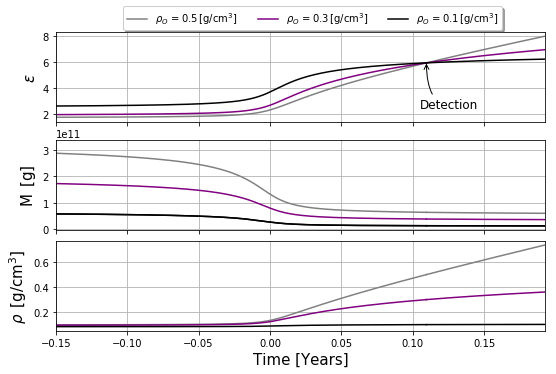

In [93]:
fig = plt.figure(figsize=(8,5))
ax3  = fig.add_axes([0.1,0.38,0.85,0.25])
ax2 = fig.add_axes([0.1,0.1,0.85,0.25])#,sharex=ax1)
ax1 = fig.add_axes([0.1,0.68,0.85,0.25])
a0=11300./2.
b0=11300./2.
c0=1900./2.




times,times2,rho_ar,rho_ar2,a_ar,a_ar2,c_ar,c_ar2,resids,resids2,fluxrec,fluxrec2 =get_aspectratio_evolution(a0,b0,c0,.5,Temperature_H2,mass_H2,rho_H2)

ax1.plot(times,a_ar/c_ar,'grey')
ax1.plot(times2,a_ar2/c_ar2,'grey',label=r'$\rho_O \,= 0.5\, \rm{[g/cm^3]}$')
ax2.plot(times,rho_ar,'grey')
ax2.plot(times2,rho_ar2,'grey')
ax3.plot(times,4./3.*np.pi*a_ar*a_ar*c_ar*rho_ar,'grey')
ax3.plot(times2,4./3.*np.pi*a_ar2*a_ar2*c_ar2*rho_ar2,'grey')
mass = 4./3.*np.pi*a_ar*a_ar*c_ar*rho_ar
mass2=4./3.*np.pi*a_ar2*a_ar2*c_ar2*rho_ar2
print "for bulk density at time of observation of rho of 0.5"
print "Oumuamua enters the solar system with"
print "a = ", a_ar[-1], "cm or" , a_ar[-1]/100. , "m"
print "c = ", c_ar[-1], "cm or" , c_ar[-1]/100. , "m"
print "rho = ", rho_ar[-1] , "g/cm^3"
print "mass = ", mass[-1]/1.e11, "X10^11 g"
print "and Oumuamua exits the solar system with"
print "a = ",a_ar2[-1], "cm or" , a_ar2[-1]/100. , "m"
print "c = ",c_ar2[-1], "cm or" , c_ar2[-1]/100. , "m"
print "rho = ",rho_ar2[-1], "g/cm^3"
print "mass = ", mass2[-1]/1.e11, "X10^11 g"
times,times2,rho_ar,rho_ar2,a_ar,a_ar2,c_ar,c_ar2,resids,resids2,fluxrec,fluxrec2 =get_aspectratio_evolution(a0,b0,c0,.3,Temperature_H2,mass_H2,rho_H2)

ax1.plot(times,a_ar/c_ar,'purple')
ax1.plot(times2,a_ar2/c_ar2,'purple',label=r'$\rho_O \,= 0.3\, \rm{[g/cm^3]}$')
ax2.plot(times,rho_ar,'purple')
ax2.plot(times2,rho_ar2,'purple')
ax3.plot(times,4./3.*np.pi*a_ar*a_ar*c_ar*rho_ar,'purple')
ax3.plot(times2,4./3.*np.pi*a_ar2*a_ar2*c_ar2*rho_ar2,'purple')
mass = 4./3.*np.pi*a_ar*a_ar*c_ar*rho_ar
mass2=4./3.*np.pi*a_ar2*a_ar2*c_ar2*rho_ar2
print 
print "for bulk density at time of observation of rho of 0.3"
print "Oumuamua enters the solar system with"
print "a = ", a_ar[-1], "cm or" , a_ar[-1]/100. , "m"
print "c = ", c_ar[-1], "cm or" , c_ar[-1]/100. , "m"
print "rho = ", rho_ar[-1] , "g/cm^3"
print "mass = ", mass[-1]/1.e11, "X10^11 g"
print "and Oumuamua exits the solar system with"
print "a = ",a_ar2[-1], "cm or" , a_ar2[-1]/100. , "m"
print "c = ",c_ar2[-1], "cm or" , c_ar2[-1]/100. , "m"
print "rho = ",rho_ar2[-1], "g/cm^3"
print "mass = ", mass2[-1]/1.e11, "X10^11 g"
times,times2,rho_ar,rho_ar2,a_ar,a_ar2,c_ar,c_ar2,resids,resids2,fluxrec,fluxrec2 =get_aspectratio_evolution(a0,b0,c0,.1,Temperature_H2,mass_H2,rho_H2)

ax1.plot(times,a_ar/c_ar,'black')
ax1.plot(times2,a_ar2/c_ar2,'black',label=r'$\rho_O \,= 0.1\, \rm{[g/cm^3]}$')
ax2.plot(times,rho_ar,'black')
ax2.plot(times2,rho_ar2,'black')
ax3.plot(times,4./3.*np.pi*a_ar*a_ar*c_ar*rho_ar,'black')
ax3.plot(times2,4./3.*np.pi*a_ar2*a_ar2*c_ar2*rho_ar2,'black')
mass = 4./3.*np.pi*a_ar*a_ar*c_ar*rho_ar
mass2=4./3.*np.pi*a_ar2*a_ar2*c_ar2*rho_ar2
print
print "for bulk density at time of observation of rho of 0.1"
print "Oumuamua enters the solar system with"
print "a = ", a_ar[-1], "cm or" , a_ar[-1]/100. , "m"
print "c = ", c_ar[-1], "cm or" , c_ar[-1]/100. , "m"
print "rho = ", rho_ar[-1] , "g/cm^3"
print "mass = ", mass[-1]/1.e11, "X10^11 g"
print "and Oumuamua exits the solar system with"
print "a = ",a_ar2[-1], "cm or" , a_ar2[-1]/100. , "m"
print "c = ",c_ar2[-1], "cm or" , c_ar2[-1]/100. , "m"
print "rho = ",rho_ar2[-1], "g/cm^3"
print "mass = ", mass2[-1]/1.e11, "X10^11 g"

ax1.legend(prop={'size': 10},ncol=3,loc='upper center',fancybox=True, shadow=True,bbox_to_anchor=(.525, 1.34))

ax1.get_xaxis().set_ticklabels([])
ax2.grid(True)
ax1.grid(True)
ax2.set_xlabel('Time [Years]',fontsize=15)
ax2.set_ylabel(r'$\rho \,\,\, \rm{[g/cm^3]}$',fontsize=15)

ax1.set_ylabel(r'$\rm{Aspect \, Ratio}$',fontsize=15)
ax1.set_ylabel(r'$\epsilon$',fontsize=15)
#ax3.set_xticklabels(['7.5 AU','5.9 AU','4.2 AU','2.4 AU','0.25 AU','2.4 AU','4.2 AU','5.9 AU','7.5 AU'])
#ax3.set_xlabel('Distance [AU]',fontsize=15)

ax1.set_xlim([-0.15,times2[-1]])
ax2.set_xlim([-0.15,times2[-1]])


#new
ax3.plot(times,4./3.*np.pi*a_ar*a_ar*c_ar*rho_ar,'black')
ax3.plot(times2,4./3.*np.pi*a_ar2*a_ar2*c_ar2*rho_ar2,'black',label=r'$\rho_O \,= 0.1\, \rm{[g/cm^3]}$')
ax3.set_xlim([-0.15,times2[-1]])
ax3.get_xaxis().set_ticklabels([])
ax3.grid(True)
ax3.set_ylabel(r'$\rm{M}\,\,\, \rm{[g]}$',fontsize=15)
ax1.annotate('Detection', xy=(times[0],11500./1900.),xytext=(0.105, 2.5),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

plt.savefig('AspectRatioEvolvev3.pdf')
print "rho_H2",rho_H2
print "Temperature_H2",Temperature_H2






{\bf We verified that the numerical scheme had converged in timesteps, strictly demanded mass conservation and produced results that were time reversible.} This description is, of course, idealized. In reality the outflow may have other molecules as well as dust entrained within it (although the observations do provide strict upper limits). Accounting for constituents other than H$_2$ would result in a coeffiecient of order unity in Equation \ref{deltameq}.


The evolution of the body in response to the time-varying solar irradiation is displayed in Figure 2. We show simulations that start with bulk densities at the date of detection of $\rho_O=0.1$, $0.3$ and $0.5 \, \rm{g \,cm^{-3}}$. We chart the evolution over a time period of $\tau\sim 3$ months encompassing the most dramatic evolution, but we evolve the simulation for $\tau\sim 2$ years centered on $t=0$ corresponding to the periastron passage. The behavior of the aspect ratio, size and density evolves asymptotically in the regions of the simulation not displayed in the plot. As an example, if 'Oumuamua had a density of $\rho_O= 0.3 \, \rm{g \,cm^{-3}}$ at the time when it was first observed, its dimensions shrank from $\sim$196 m x {\bf196 m} x 104 (with $\rho_{\rm{bulk}}\sim0.093 \, \rm{g \,cm^{-3}}$)  upon entering the solar system to
$\sim$113 m x 113 m x 19 m when observed to $\sim$110 m x 110 m x 16 m upon exiting (with $\rho_{\rm{bulk}}\sim0.36 \, \rm{g \,cm^{-3}}$). As a consequence of the encounter with the Sun, the total mass dropped by a factor {\bf of 5 -- from $2\times10^{11}\,{\rm g}$ to $4\times10^{10}\,{\rm g}$.} (A visual depiction of this evolution is presented in Figure 1). We conclude that, for a range of plausible initial conditions, `Oumuamua entered the Solar System with an aspect ratio $\epsilon\sim2-3$ and a bulk density $\rho_{\rm{bulk}}\sim0.1\,\rm{g \,cm^{-3}}$.   \footnote{The script to generate the data in Table 1, these simulations and Figure 2 may be found at \url{https://github.com/DSeligman/Oumuamua_Hydrogen}.}

# Mass Conservation Test

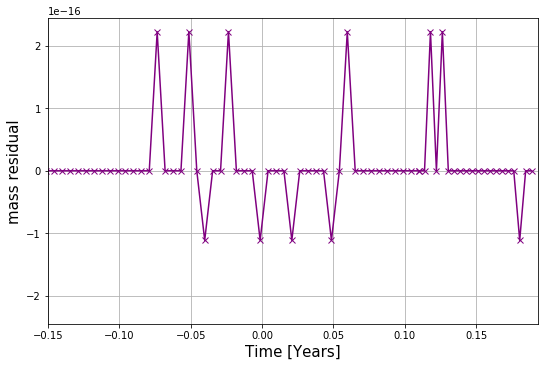

In [118]:
#
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_axes([0.1,0.1,0.85,0.85])

times,times2,rho_ar,rho_ar2,a_ar,a_ar2,c_ar,c_ar2,resids,resids2,fluxrec,fluxrec2 =get_aspectratio_evolution(a0,b0,c0,.3,Temperature_H2,mass_H2,rho_H2)
skip=500
ax1.plot(times[::skip],(resids-1.)[::skip],'purple',marker='x')
skip=5000
ax1.plot(times2[::skip],(resids2-1.)[::skip],'purple',label=r'$\rho_O \,= 0.3\, \rm{[g/cm^3]}$',marker='x')
ax1.grid(True)
ax1.set_xlabel('Time [Years]',fontsize=15)
ax1.set_ylabel('mass residual',fontsize=15)
ax1.set_xlim([-0.15,times2[-1]])
plt.savefig('Mass_conservation_convergence.pdf')

# Convergence Test for Timestepping

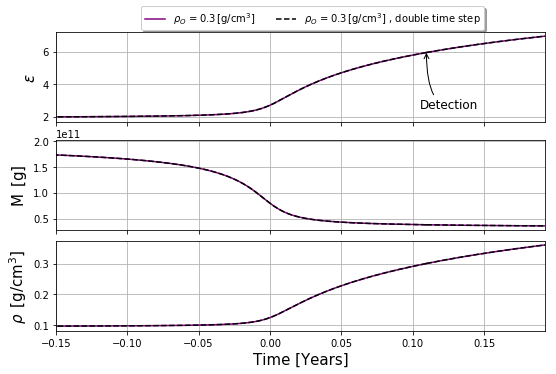

In [117]:
times,times2,rho_ar,rho_ar2,a_ar,a_ar2,c_ar,c_ar2,resids,resids2,fluxrec,fluxrec2 =get_aspectratio_evolution(a0,b0,c0,.3,Temperature_H2,mass_H2,rho_H2)
times_dbl,times2_dbl,rho_ar_dbl,rho_ar2_dbl,a_ar_dbl,a_ar2_dbl,c_ar_dbl,c_ar2_dbl,resids_dbl,resids2_dbl,fluxrec_dbl,fluxrec2_dbl =get_aspectratio_evolution(a0,b0,c0,.3,Temperature_H2,mass_H2,rho_H2,Nsteps=100000*2)



fig = plt.figure(figsize=(8,5))
ax3  = fig.add_axes([0.1,0.38,0.85,0.25])
ax2 = fig.add_axes([0.1,0.1,0.85,0.25])#,sharex=ax1)
ax1 = fig.add_axes([0.1,0.68,0.85,0.25])

ax1.plot(times,a_ar/c_ar,'purple')
ax1.plot(times2,a_ar2/c_ar2,'purple',label=r'$\rho_O \,= 0.3\, \rm{[g/cm^3]}$')
ax2.plot(times,rho_ar,'purple')
ax2.plot(times2,rho_ar2,'purple')
ax3.plot(times,4./3.*np.pi*a_ar*a_ar*c_ar*rho_ar,'purple')
ax3.plot(times2,4./3.*np.pi*a_ar2*a_ar2*c_ar2*rho_ar2,'purple')

#plot double timestepped
ax1.plot(times_dbl,a_ar_dbl/c_ar_dbl,'k--')
ax1.plot(times2_dbl,a_ar2_dbl/c_ar2_dbl,'k--',label=r'$\rho_O \,= 0.3\, \rm{[g/cm^3]}$ , double time step')
ax2.plot(times_dbl,rho_ar_dbl,'k--')
ax2.plot(times2_dbl,rho_ar2_dbl,'k--')
ax3.plot(times_dbl,4./3.*np.pi*a_ar_dbl*a_ar_dbl*c_ar_dbl*rho_ar_dbl,'k--')
ax3.plot(times2_dbl,4./3.*np.pi*a_ar2_dbl*a_ar2_dbl*c_ar2_dbl*rho_ar2_dbl,'k--')

mass = 4./3.*np.pi*a_ar*a_ar*c_ar*rho_ar
mass2=4./3.*np.pi*a_ar2*a_ar2*c_ar2*rho_ar2

ax1.legend(prop={'size': 10},ncol=3,loc='upper center',fancybox=True, shadow=True,bbox_to_anchor=(.525, 1.34))

ax1.get_xaxis().set_ticklabels([])
ax2.grid(True)
ax1.grid(True)
ax2.set_xlabel('Time [Years]',fontsize=15)
ax2.set_ylabel(r'$\rho \,\,\, \rm{[g/cm^3]}$',fontsize=15)
ax1.set_ylabel(r'$\rm{Aspect \, Ratio}$',fontsize=15)
ax1.set_ylabel(r'$\epsilon$',fontsize=15)


ax1.set_xlim([-0.15,times2[-1]])
ax2.set_xlim([-0.15,times2[-1]])
ax3.set_xlim([-0.15,times2[-1]])
ax3.get_xaxis().set_ticklabels([])
ax3.grid(True)
ax3.set_ylabel(r'$\rm{M}\,\,\, \rm{[g]}$',fontsize=15)
ax1.annotate('Detection', xy=(times[0],11500./1900.),xytext=(0.105, 2.5),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))
plt.savefig("timestep_convergence.pdf")


# Time reversability Check

In [139]:
#run the function the opposite way in time to check
def get_aspectratio_evolution_reverse(a0,b0,c0,rho00,Temperature_X,mass_X,rho_X,Nsteps=100000):
    gamma=4./3.
    G=6.674e-8#cm^3 g^-1 s^-2 #gravitational constant
    Msun = 1.988435e33 #g maass of sun
    mu = G*Msun #mu parameter
    AU=1.496e13#cm #1AU in cm
    year = 60.*60.*24.*365.#1 year in seconds
    a=-1.2798*AU #hyperbolic semi major axis - rp = a(1-e)  - which gives rp= 0.255
    v_inf=5.59*AU/year # escape velocity in cm/s
    e=1.20 #eccentricity

    startime= 3.456e6/60./60./24./365. #number of seconds between September 9 and October 17 2017
    boltzman = 1.381e-16 #erg / kelvin
    Joule_toErg = 1.e7
    #backward integration one year in the past
    times = np.linspace(startime,-1.,Nsteps)
    timessec = times*year
    dt = timessec[0]-timessec[1]
    dist_ar=np.zeros_like(times)
    rho_ar=np.zeros_like(times)
    a_ar=np.zeros_like(times)
    c_ar=np.zeros_like(times)
    mass_ar=np.zeros_like(times)
    resids=np.zeros_like(times)
    fluxrec=np.zeros_like(times)
    i=0
    rhobulk=rho00
    totflux=0.
    Lsunwatt = 3.848e26 #watts
    watt_to_erg = 1.e7 #ergs / watt
    Lsun = Lsunwatt*watt_to_erg
    
    #forward integration 
    times2 = np.linspace(-1.,startime+1./12.,Nsteps)
    timessec2 = times2*year
    dt = timessec2[0]-timessec2[1]
    dist_ar2=np.zeros_like(times2)
    rho_ar2=np.zeros_like(times2)
    a_ar2=np.zeros_like(times2)
    c_ar2=np.zeros_like(times2)
    mass_ar2=np.zeros_like(times2)
    resids2=np.zeros_like(times2)
    fluxrec2=np.zeros_like(times2)
    i=0
    rhobulk=rho00
    for t in times2:
        if (i==0):
            r,E = get_distance(t*year,mu,a,v_inf,-50.,e)
            eccentricity = np.sqrt(1.-c0**2/a0**2)
            surface_area = 2.*np.pi*a0*a0*(1.+c0**2/a0**2/eccentricity*np.arctanh(eccentricity))
            a1=a0
            b1=b0
            c1=c0
            deltah=10.
        else:
            r,E = get_distance(t*year,mu,a,v_inf,E,e)
            eccentricity = np.sqrt(1.-c1**2/a1**2)
            surface_area = 2.*np.pi*a1*a1*(1.+c1**2/a1**2/eccentricity*np.arctanh(eccentricity))

    
        dist_ar2[i]=r
        alpha_r = 4.92e-4*(r/AU)**(-2)
        cs = np.sqrt(gamma*boltzman*Temperature_X/mass_X)
        Volume =4./3.*np.pi*a1*b1*c1
        deltaM = dt*Volume*rhobulk*2.*alpha_r/cs
        deltaVolume = deltaM/rho_X
        sol= optimize.root(getdh, [deltah],args=(Volume+deltaVolume,a1,b1,c1), method='hybr')
        deltah= sol.x[0]
        a1+=deltah
        b1+=deltah
        c1+=deltah
        rhobulk=(rhobulk*Volume+deltaM)/(Volume+deltaVolume)
        rho_ar2[i]=rhobulk
        a_ar2[i]=a1
        c_ar2[i]=c1
        mass_ar2[i]=Volume*rhobulk
        flux = Lsun/(4.*np.pi*r*r)
        totflux+=flux*dt
        fluxrec2[i]=flux
        residual = deltaM/(deltaVolume*rho_X)
        resids2[i]=residual
        i+=1
    
    return times,times2,rho_ar,rho_ar2,a_ar,a_ar2,c_ar,c_ar2,resids,resids2,fluxrec,fluxrec2

In [140]:
#times,times2,rho_ar,rho_ar2,a_ar,a_ar2,c_ar,c_ar2,resids,resids2,fluxrec,fluxrec2 =get_aspectratio_evolution(a0,b0,c0,.3,Temperature_H2,mass_H2,rho_H2)
times_rev,times2_rev,rho_ar_rev,rho_ar2_rev,a_ar_rev,a_ar2_rev,c_ar_rev,c_ar2_rev,resids_rev,resids2_rev,fluxrec_rev,fluxrec2_rev =get_aspectratio_evolution_reverse(a_ar[-1],a_ar[-1],c_ar[-1],rho_ar[-1],Temperature_H2,mass_H2,rho_H2)


print times[-1]
print times2[-1]

-1.0
0.19292237442922372


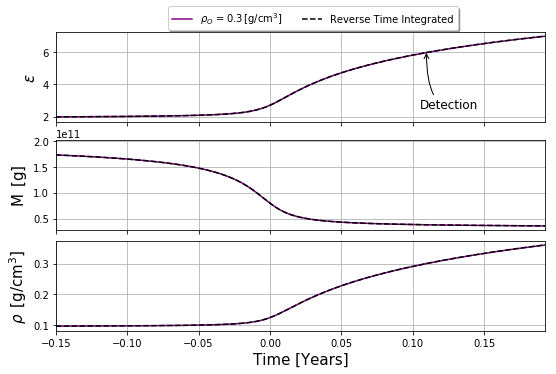

In [144]:


fig = plt.figure(figsize=(8,5))
ax3  = fig.add_axes([0.1,0.38,0.85,0.25])
ax2 = fig.add_axes([0.1,0.1,0.85,0.25])#,sharex=ax1)
ax1 = fig.add_axes([0.1,0.68,0.85,0.25])

ax1.plot(times,a_ar/c_ar,'purple')
ax1.plot(times2,a_ar2/c_ar2,'purple',label=r'$\rho_O \,= 0.3\, \rm{[g/cm^3]}$')
ax2.plot(times,rho_ar,'purple')
ax2.plot(times2,rho_ar2,'purple')
ax3.plot(times,4./3.*np.pi*a_ar*a_ar*c_ar*rho_ar,'purple')
ax3.plot(times2,4./3.*np.pi*a_ar2*a_ar2*c_ar2*rho_ar2,'purple')

#ax1.plot(times_rev,a_ar_rev/c_ar_rev,'purple')
ax1.plot(times2_rev,a_ar2_rev/c_ar2_rev,'k--',label=r'Reverse Time Integrated')
#ax2.plot(times,rho_ar,'purple')
ax2.plot(times2_rev,rho_ar2_rev,'k--')
#ax3.plot(times,4./3.*np.pi*a_ar*a_ar*c_ar*rho_ar,'purple')
ax3.plot(times2_rev,4./3.*np.pi*a_ar2_rev*a_ar2_rev*c_ar2_rev*rho_ar2_rev,'k--')



ax1.legend(prop={'size': 10},ncol=3,loc='upper center',fancybox=True, shadow=True,bbox_to_anchor=(.525, 1.34))

ax1.get_xaxis().set_ticklabels([])
ax2.grid(True)
ax1.grid(True)
ax2.set_xlabel('Time [Years]',fontsize=15)
ax2.set_ylabel(r'$\rho \,\,\, \rm{[g/cm^3]}$',fontsize=15)
ax1.set_ylabel(r'$\rm{Aspect \, Ratio}$',fontsize=15)
ax1.set_ylabel(r'$\epsilon$',fontsize=15)


ax1.set_xlim([-0.15,times2[-1]])
ax2.set_xlim([-0.15,times2[-1]])
ax3.set_xlim([-0.15,times2[-1]])
ax3.get_xaxis().set_ticklabels([])
ax3.grid(True)
ax3.set_ylabel(r'$\rm{M}\,\,\, \rm{[g]}$',fontsize=15)
ax1.annotate('Detection', xy=(times[0],11500./1900.),xytext=(0.105, 2.5),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))
plt.savefig("timereversability_convergence.pdf")



We can extend the calculation further backward in time to investigate the geometric evolution as Oumuamua traveled through the galaxy and before it encountered the Solar System. We perform a similar simulation tracking the aspect ratio, size and density as  it was exposed to the galactic cosmic ray flux $\Phi_{CR}\sim 10^9\, {\rm ev\, cm^{-2} s^{-1}}$ \citep{White1996}. Using the initial conditions from the preceding calculation for the case where $\rho_O\sim0.3 \, \rm{g \,cm^{-3}}$, we calculate that Oumuamua reached primordial aspect ratios of $\epsilon \sim 1.75$, $\sim 1.55$ and $ \sim 1.28$ after  $\tau \sim 10\, \rm{Myr}$,  $ \sim 30\, \rm{Myr}$ and  $ \sim 100\, \rm{Myr}$ of evolution, respectively. 
 We also extended the calculation forward in time, and found that  Oumuamua would have survived for an additional  $ \sim 35-40\, \rm{Myr}$ if it had not encountered our Solar System, or when the bulk density reached $\rho_{\rm{bulk}}\sim0.8\,\rm{g \,cm^{-3}}$. In this simple model, prior to encountering the Solar System, ‘Oumuamua still had an appreciable fraction of it’s estimated total lifetime remaining.

# Galactic Cosmic Ray Evolution

In [145]:
fluxCR =1.e9*1.6e-12 #erg / cm^2 / s

times3 = np.linspace(-1.,-1.e8,100000)
timessec = times3*year
dt = (timessec[1]-timessec[0])*-1.
i=0
a0= a_ar[-1]
b0=a_ar[-1]
c0= c_ar[-1]
rho_bulk=rho_ar[-1]

print a0,b0,c0
print rho_bulk
rho_galaxy=np.zeros_like(times3)
a_galaxy=np.zeros_like(times3)
c_galaxy=np.zeros_like(times3)
fluxrec3=np.zeros_like(times3)
Avogadro=6.0221409e23
boltzman = 1.381e-16 #erg / kelvin
i=0
print rho_H2
totflux=0
for t in times3:
    if (i==0):
            
        eccentricity = np.sqrt(1.-c0**2/a0**2)
        surface_area = 2.*np.pi*a0*a0*(1.+c0**2/a0**2/eccentricity*np.arctanh(eccentricity))
        a1=a0
        b1=b0
        c1=c0
        deltah=10.
    else:
        
        eccentricity = np.sqrt(1.-c1**2/a1**2)
        surface_area = 2.*np.pi*a1*a1*(1.+c1**2/a1**2/eccentricity*np.arctanh(eccentricity))
    
    
    cs = np.sqrt(gamma*boltzman*Temperature_H2/mass_H2)
    Volume =4./3.*np.pi*a1*b1*c1
    deltaM = dt*surface_area*mass_H2*fluxCR/(deltaH_H2/Avogadro+ 4./3.*boltzman*Temperature_H2)
    deltaVolume = deltaM/rho_H2
    sol= optimize.root(getdh, [deltah],args=(Volume+deltaVolume,a1,b1,c1), method='hybr')
    deltah= sol.x[0]
    rho_bulk=(rho_bulk*Volume+deltaM)/(Volume+deltaVolume)
    rho_galaxy[i]=rho_bulk
   
    a_galaxy[i]=a1
    c_galaxy[i]=c1
    a1+=deltah
    b1+=deltah
    c1+=deltah
    #flux = Lsun/(4.*np.pi*r*r)
    totflux+=fluxCR*dt
   
    fluxrec3[i]=fluxCR*dt
    #
    #Volume =4./3.*np.pi*a1*b1*c1
    #rho_bulk=(rho_bulk*Volume+deltaM)/(Volume+surface_area*deltah)
    
    
    i+=1
    

9823.920246449694 9823.920246449694 5123.920246449736
0.09349183944079004
0.08


Text(0,0.5,'Flux CR')

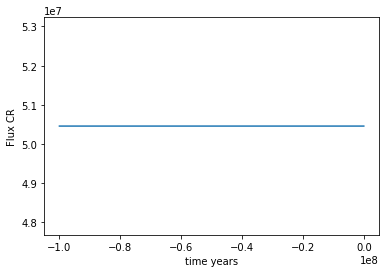

In [147]:
plt.plot(times3,fluxrec3)
plt.xlabel('time years')
plt.ylabel('Flux CR')

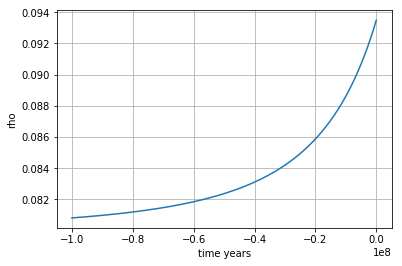

In [152]:
plt.plot(times3,rho_galaxy)
plt.xlabel('time years')
plt.ylabel('rho')
plt.grid()

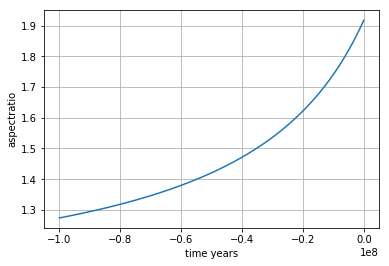

In [153]:
plt.plot(times3,a_galaxy/c_galaxy)
plt.xlabel('time years')
plt.ylabel('aspectratio')
plt.grid()

In [155]:
idx = (np.abs(times3 - -1.e7)).argmin()
print "10MYR in the past, Oumaumau has aspect ratio of"
print np.array(a_galaxy/c_galaxy)[idx]
print "30MYR in the past, Oumaumau has aspect ratio of"
idx = (np.abs(times3 - -3.e7)).argmin()

print np.array(a_galaxy/c_galaxy)[idx]

idx = (np.abs(times3 - -1.e8)).argmin()
print "100MYR in the past, Oumaumau has aspect ratio of"

print np.array(a_galaxy/c_galaxy)[idx]

10MYR in the past, Oumaumau has aspect ratio of
1.7407813093390716
30MYR in the past, Oumaumau has aspect ratio of
1.5362536881427222
100MYR in the past, Oumaumau has aspect ratio of
1.2740178764282328


# Check Oumuamua's galactic evolution if it had not seen the Sun

In [156]:
#look at galactic evolution
fluxCR =1.e9*1.6e-12 #erg / cm^2 / s

times3 = np.linspace(1.,1.e8,100000)
timessec = times3*year
dt = (timessec[1]-timessec[0])*-1.
i=0
a0= a_ar[-1]
b0=a_ar[-1]
c0= c_ar[-1]
rho_bulk=rho_ar[-1]

print a0,b0,c0
print rho_bulk
rho_galaxy=np.zeros_like(times3)
a_galaxy=np.zeros_like(times3)
c_galaxy=np.zeros_like(times3)
fluxrec3=np.zeros_like(times3)
Avogadro=6.0221409e23
boltzman = 1.381e-16 #erg / kelvin
i=0
print rho_H2
totflux=0
for t in times3:
    if (i==0):
            
        eccentricity = np.sqrt(1.-c0**2/a0**2)
        surface_area = 2.*np.pi*a0*a0*(1.+c0**2/a0**2/eccentricity*np.arctanh(eccentricity))
        a1=a0
        b1=b0
        c1=c0
        deltah=10.
    else:
        
        eccentricity = np.sqrt(1.-c1**2/a1**2)
        surface_area = 2.*np.pi*a1*a1*(1.+c1**2/a1**2/eccentricity*np.arctanh(eccentricity))
    
    
    cs = np.sqrt(gamma*boltzman*Temperature_H2/mass_H2)
    Volume =4./3.*np.pi*a1*b1*c1
    deltaM = dt*surface_area*mass_H2*fluxCR/(deltaH_H2/Avogadro+ 4./3.*boltzman*Temperature_H2)
    deltaVolume = deltaM/rho_H2
    sol= optimize.root(getdh, [deltah],args=(Volume+deltaVolume,a1,b1,c1), method='hybr')
    deltah= sol.x[0]
    rho_bulk=(rho_bulk*Volume+deltaM)/(Volume+deltaVolume)
    rho_galaxy[i]=rho_bulk
   
    a_galaxy[i]=a1
    c_galaxy[i]=c1
    a1+=deltah
    b1+=deltah
    c1+=deltah
    #flux = Lsun/(4.*np.pi*r*r)
    totflux+=fluxCR*dt
   
    fluxrec3[i]=fluxCR*dt
    #
    #Volume =4./3.*np.pi*a1*b1*c1
    #rho_bulk=(rho_bulk*Volume+deltaM)/(Volume+surface_area*deltah)
    
    
    i+=1
    

9823.920246449694 9823.920246449694 5123.920246449736
0.09349183944079004
0.08


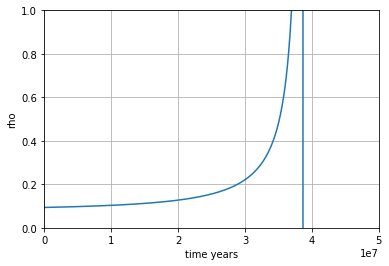

In [158]:
plt.plot(times3,rho_galaxy)
plt.xlabel('time years')
plt.ylabel('rho')
plt.xlim([0,5.e7])
plt.ylim([0,1])
plt.grid()

# Section 4

${\rm H}_2$ in the gas phase forms via dust-catalyzed reactions and is the dominant constituent of Giant Molecular Clouds [GMCs] \citep{Hollenbach1971, Wakelam2017}. The coldest, highest-density regions within GMCs are prestellar cores, which concentrate along filaments that pervade the overall cloud structure and have $T\le10\,{\rm K}$ and number densities, $n\ge10^5 - 10^{6}\,{\rm cm}^{-3}$ \citep{Andre2014}. At the 2.7K cosmic background temperature, solid ${\rm H}_2$ has a sublimation vapor pressure corresponding to $n\simeq 3\times10^{5}\,{\rm cm}^{-3}$\citep{Anderson1989}. In regions of low cosmic ray density (such as in the inner regions of M31), CO observations suggest that temperatures very close to the microwave background can be achieved \citep{Laurent1998}. Recent observations by \citet{Kong2016} of line emission from multiple transitions involving N$_2$D$^+$ and N$_2$H$^+$ in massive starless/early-stage molecular cloud cores points to excitation temperatures of $T\sim4\,{\rm K}$. Identification of even colder gas may be possible through observation of ortho-H$_2$D$^+$, which has been detected with the Atacama Large Millimeter/submillimeter Array \citep{Friesen2014}. Given a temperature of order 3$K$ in a dense core, nucleated growth of solid hydrogen onto interstellar grains can occur. 

In [183]:
#set sublimation vapor pressure to solve for the number density at cold temperatures, reference is from physicist desk reference
Pressure = 1.e-13 *10./7.5e-3 # TORR from physicist desk reference
print "pressure is 1e-13 Torr, which is ",Pressure,"dyne/cm^2"
Volume = 1.#cm^3
Tambient = 2.67 #kevlin
boltzman = 1.381e-16 #erg / kelvin
numberdensity =  Pressure*Volume/boltzman/Tambient
print "ambient number density is", numberdensity, "per cm^3"
print "very close to that typcial of a cloud"

pressure is 1e-13 Torr, which is  1.33333333333e-10 dyne/cm^2
ambient number density is 361604.475217 per cm^3
very close to that typcial of a cloud



Typical interstellar grains, formed from carbon or silicon compounds have sizes, $D_{\rm g}\sim1{\mu}{\rm m}$, cross sectional areas, $\sigma_{\rm g}\sim10^{-8}\,{\rm cm^2}$, and masses $m_{\rm g}\sim10^{-12}\,{\rm g}$ \citep{Draine2003}. For a dense molecular cloud core with $n_{\rm H2}=10^{6}\,{\rm cm^{-3}}$ and metallicity $Z=0.01$, this implies a grain number density $n_{\rm g}=3\times10^{-8}\,{\rm cm}^{-3}$. Equipartition at $T=2.7\,{\rm K}$ gives a grain velocity $v_{\rm g}\sim0.03\,{\rm cm\,s^{-1}}$ (implying a grain-grain collision rate of $\Gamma=n_{\rm g}\sigma_{\rm g} v_{\rm g}=10^{-17}\,{\rm s}^{-1}$, which is entirely negligible). 

In [182]:
Dg = 1.e-4#cm #1 micron
sigmag = 1.e-8 #cm^-2
mg=1.e-12#g 
nH2 = 1.e6# per cm^3
Z=0.01 #metallicity
mass_H2=2.*1.67e-24#grams
print "mass in grains is mass of hydrogen times metallicity", nH2*mass_H2*Z , "g/cm^3"
print "number density in grains is this divided by mass of grains", nH2*mass_H2*Z / mg , "/cm^3"
ng = nH2*mass_H2*Z / mg
#grain grain collision rate Gamma 

#sound speed of the gas at  cold temperatures
cs = np.sqrt(5./3.*boltzman*3./mass_H2)

#equipartition of energby - m_H2 *v_H2 ^2 =  m_grain *v_grain^2
vg = np.sqrt(mass_H2/mg)*cs
print "typical grain velocity from equipartion of gas and dust is", vg ,"cm/s"

Gamma = ng *sigmag *vg
print "Gamma is the grain grain collision rate = n sigma v =", Gamma ,"per second"

mass in grains is mass of hydrogen times metallicity 3.34e-20 g/cm^3
number density in grains is this divided by mass of grains 3.34e-08 /cm^3
typical grain velocity from equipartion of gas and dust is 0.026277366686941826 cm/s
Gamma is the grain grain collision rate = n sigma v = 8.77664047343857e-18 per second


For $n_{\rm H2}=10^{6}\,{\rm cm^{-3}}$ and $T=2.7\,$K, the sublimation vapor pressure is exceeded by a factor of 3, and molecular hydrogen will freeze out onto the interstellar grains. This process is relatively rapid. 

In [187]:
#consider a cloud of nH2 - 1e6 and T ~ 2.7K
print "the ambient pressure is", nH2*2.7*boltzman,"dyne/cm^2"
print "which is ",nH2*2.7*boltzman/Pressure,"times the sublimation vapor pressure"

the ambient pressure is 3.7287e-10 dyne/cm^2
which is  2.796525 times the sublimation vapor pressure


The collision rate of ${\rm H}_2$ molecules onto grains leads to a grain mass increase rate $dM_{\rm g}/dt\sim6\times10^{-22}\,{\rm g\,s^{-1}}$,  and growth timescale $\tau\sim 500\,{\rm yr}$ (for sticking probability, $s=0.1$). Hence, within several times $10^{4}$ years of the onset of freeze-out, a significant fraction of the ${\rm H}_2$ will sequester onto the small grains.

In [206]:
#calculate h2 n (gas) sigma (dust grains) v (gas) collision rate

collisionrate_h2 = nH2*sigmag*cs

print "typical collision rate of frozen h2 onto dust is n sigma(gas) v,", collisionrate_h2
# dm/dt
dmdt=collisionrate_h2 *mass_H2
print "which gives a rate dMg/dt~",dmdt , "g/s"

print "this gives us a characteristic freeze out timescale mass~ grain/ dmdt = ", mg/dmdt/year, "years"
print "if stickiing probbility ~.1, then the rate is about",mg/dmdt/year/.1, "years"

typical collision rate of frozen h2 onto dust is n sigma(gas) v, 143.78335332927375
which gives a rate dMg/dt~ 4.802364001197744e-22 g/s
this gives us a characteristic freeze out timescale mass~ grain/ dmdt =  66.02954706443731 years
if stickiing probbility ~.1, then the rate is about 660.295470644373 years


When condensation conditions for ${\rm H}_2$ are achieved,  the resulting H$_2$-mantled grains in a GMC core are subject to several charging processes which aid the growth of large dust aggregates in regions where the gas number density is in the range $10^{4}\,{\rm cm}^{-3} < n < 10^{6}\,{\rm cm}^{-3}$ \citep{Ivlev2015}. In short, cold plasma charging tends to give grains negative charge; cosmic rays ionize gas molecules, and electrons, due to their higher velocities, preferentially land on grains. On the other hand, UV radiation stemming from the cosmic ray ionization events produces photoelectric charging of grains which imparts positive charge to grains. \citet{Ivlev2015} show that competition between the cold-plasma collection and photo-emission will create  approximately equal abundances of positively and negatively charged dust. Critically, their derived optimum is size-independent, permitting large aggregates to be produced. An H$_2$-rich `Oumuamua-precursor with $r=300\,{\rm m}$ requires H$_2$ ice condensates to coagulate within a $D\sim70,000\,{\rm km}$ sided volume of the GMC. If this is to occur over a $\tau\sim10,000$ yr time scale, characteristic grain velocities of order $v\sim0.02$ cm/s are required.